<a href="https://colab.research.google.com/github/Rinu653/Data-Science/blob/main/Avocado_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/avacado.csv')

In [4]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.size

255486

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df.shape

(18249, 14)

In [8]:
new_df=df.drop_duplicates()

In [9]:
new_df.shape

(18249, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [11]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [12]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [13]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [15]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [57]:
avocado=df.drop(['Unnamed: 0','Date','4046','4225','4770','XLarge Bags'],axis=1)

In [56]:
avocado.columns

Index(['AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags',
       'Large Bags', 'type', 'year', 'region'],
      dtype='object')

In [75]:
avocado

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,conventional,2015,Albany
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,organic,2018,WestTexNewMexico
18245,1.71,13888.04,9264.84,8940.04,324.80,organic,2018,WestTexNewMexico
18246,1.87,13766.76,9394.11,9351.80,42.31,organic,2018,WestTexNewMexico
18247,1.93,16205.22,10969.54,10919.54,50.00,organic,2018,WestTexNewMexico


In [19]:
# correlation of numerical columns

avocado.corr()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,year
AveragePrice,1.000000,-0.192752,-0.177088,-0.174730,-0.172940,0.093197
Total Volume,-0.192752,1.000000,0.963047,0.967238,0.880640,0.017193
Total Bags,-0.177088,0.963047,1.000000,0.994335,0.943009,0.071552
Small Bags,-0.174730,0.967238,0.994335,1.000000,0.902589,0.063915
Large Bags,-0.172940,0.880640,0.943009,0.902589,1.000000,0.087891
year,0.093197,0.017193,0.071552,0.063915,0.087891,1.000000


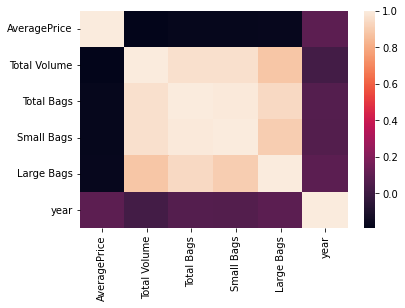

In [20]:
# represent correlation

sns.heatmap(avocado.corr())

In [21]:
avocado['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


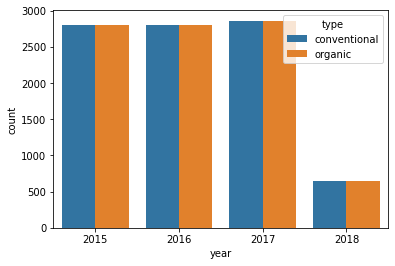

In [22]:
sns.countplot('year',data=avocado,hue='type')

In [74]:
reg=avocado['region'].value_counts()
reg

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


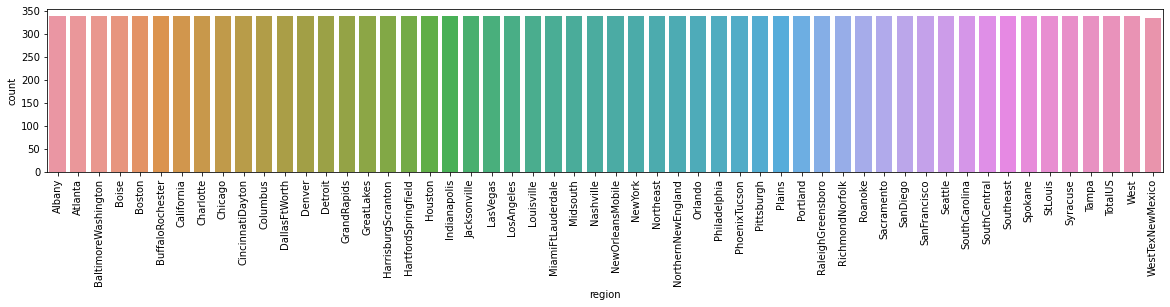

In [25]:
#representation of region counts
plt.figure(figsize=(20,3))
sns.countplot('region',data=avocado)
plt.xticks(rotation=90);

In [26]:
avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


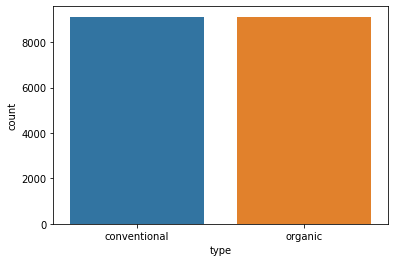

In [27]:
# count plot
# will calculate the count of categorical data and plot.

sns.countplot('type',data=avocado)

In [28]:
# grouping region and its averageprice

grp=avocado.groupby('region')['AveragePrice'].mean().reset_index().sort_values(by='AveragePrice',ascending=False)
grp

,region,AveragePrice
17,HartfordSpringfield,1.818639
42,SanFrancisco,1.804201
28,NewYork,1.727574
32,Philadelphia,1.632130
40,Sacramento,1.621568
7,Charlotte,1.606036
29,Northeast,1.601923
0,Albany,1.561036
8,Chicago,1.556775
37,RaleighGreensboro,1.555118


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

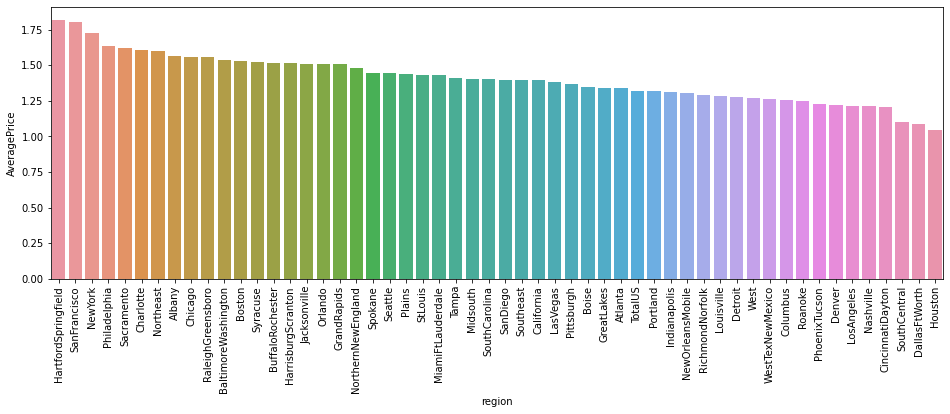

In [29]:
plt.figure(figsize=(16,5))
sns.barplot(x='region',y='AveragePrice',data=grp)
plt.xticks(rotation=90)

In [30]:
# grouping year and it's averageprice

grp_year=avocado.groupby('year')['AveragePrice'].mean().reset_index().sort_values(by='year',ascending=True)
grp_year

,year,AveragePrice
0,2015,1.375590
1,2016,1.338640
2,2017,1.515128
3,2018,1.347531


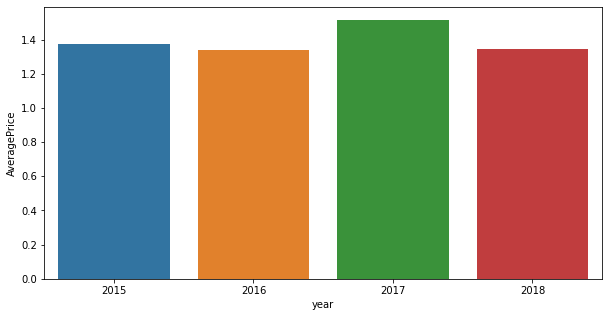

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x='year',y='AveragePrice',data=grp_year)

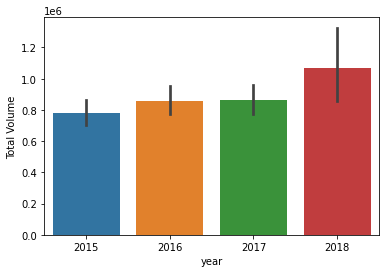

In [38]:
sns.barplot(x='year',y='Total Volume',data=avocado)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

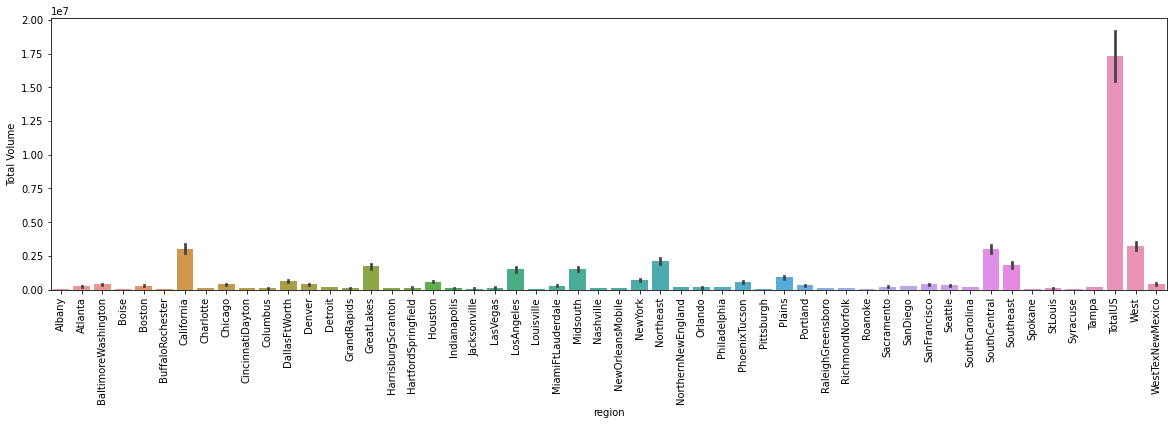

In [41]:
plt.figure(figsize=(20,5))
sns.barplot(x='region',y='Total Volume',data=avocado)
plt.xticks(rotation=90)

In [55]:
avocado.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,conventional,2015,Albany


In [54]:
# encoding - get dummy

dummy=pd.get_dummies(avocado[['type','region']],drop_first=True)
dummy

,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
# combine dummy file and original file
new_df=pd.concat([avocado,dummy],axis=1)
new_df

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,type,year,region,type_organic,region_Atlanta,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,8696.87,8603.62,93.25,conventional,2015,Albany,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,9505.56,9408.07,97.49,conventional,2015,Albany,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,8145.35,8042.21,103.14,conventional,2015,Albany,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,5811.16,5677.40,133.76,conventional,2015,Albany,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,6183.95,5986.26,197.69,conventional,2015,Albany,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,organic,2018,WestTexNewMexico,1,0,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,9264.84,8940.04,324.80,organic,2018,WestTexNewMexico,1,0,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,9394.11,9351.80,42.31,organic,2018,WestTexNewMexico,1,0,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,10969.54,10919.54,50.00,organic,2018,WestTexNewMexico,1,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
new_df.columns

Index(['AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags',
       'Large Bags', 'type', 'year', 'region', 'type_organic',
       'region_Atlanta', 'region_BaltimoreWashington', 'region_Boise',
       'region_Boston', 'region_BuffaloRochester', 'region_California',
       'region_Charlotte', 'region_Chicago', 'region_CincinnatiDayton',
       'region_Columbus', 'region_DallasFtWorth', 'region_Denver',
       'region_Detroit', 'region_GrandRapids', 'region_GreatLakes',
       'region_HarrisburgScranton', 'region_HartfordSpringfield',
       'region_Houston', 'region_Indianapolis', 'region_Jacksonville',
       'region_LasVegas', 'region_LosAngeles', 'region_Louisville',
       'region_MiamiFtLauderdale', 'region_Midsouth', 'region_Nashville',
       'region_NewOrleansMobile', 'region_NewYork', 'region_Northeast',
       'region_NorthernNewEngland', 'region_Orlando', 'region_Philadelphia',
       'region_PhoenixTucson', 'region_Pittsburgh', 'region_Plains',
       'region_Portland

In [59]:
# while combin the 2 dataset (encoded and original file), it contains the encoded data's (type, region) which has to be droped 

df_av=new_df.drop(['type','region'],axis=1)
df_av


,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,year,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,8696.87,8603.62,93.25,2015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,9505.56,9408.07,97.49,2015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,8145.35,8042.21,103.14,2015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,5811.16,5677.40,133.76,2015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,6183.95,5986.26,197.69,2015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,2018,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,9264.84,8940.04,324.80,2018,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,9394.11,9351.80,42.31,2018,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,10969.54,10919.54,50.00,2018,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
df_av.dtypes

AveragePrice                  float64
Total Volume                  float64
Total Bags                    float64
Small Bags                    float64
Large Bags                    float64
year                            int64
type_organic                    uint8
region_Atlanta                  uint8
region_BaltimoreWashington      uint8
region_Boise                    uint8
region_Boston                   uint8
region_BuffaloRochester         uint8
region_California               uint8
region_Charlotte                uint8
region_Chicago                  uint8
region_CincinnatiDayton         uint8
region_Columbus                 uint8
region_DallasFtWorth            uint8
region_Denver                   uint8
region_Detroit                  uint8
region_GrandRapids              uint8
region_GreatLakes               uint8
region_HarrisburgScranton       uint8
region_HartfordSpringfield      uint8
region_Houston                  uint8
region_Indianapolis             uint8
region_Jacks

In [63]:
df_av

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,year,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,8696.87,8603.62,93.25,2015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,9505.56,9408.07,97.49,2015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,8145.35,8042.21,103.14,2015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,5811.16,5677.40,133.76,2015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,6183.95,5986.26,197.69,2015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,2018,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,9264.84,8940.04,324.80,2018,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,9394.11,9351.80,42.31,2018,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,10969.54,10919.54,50.00,2018,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
x=df_av.iloc[:,1:]
x

,Total Volume,Total Bags,Small Bags,Large Bags,year,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,64236.62,8696.87,8603.62,93.25,2015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,54876.98,9505.56,9408.07,97.49,2015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,118220.22,8145.35,8042.21,103.14,2015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,78992.15,5811.16,5677.40,133.76,2015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51039.60,6183.95,5986.26,197.69,2015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,13498.67,13066.82,431.85,2018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,13888.04,9264.84,8940.04,324.80,2018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,13766.76,9394.11,9351.80,42.31,2018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,16205.22,10969.54,10919.54,50.00,2018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
y=df_av.iloc[:,1]
y

0         64236.62
1         54876.98
2        118220.22
3         78992.15
4         51039.60
           ...    
18244     17074.83
18245     13888.04
18246     13766.76
18247     16205.22
18248     17489.58
Name: Total Volume, Length: 18249, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
y_test

8604     218329.70
2608     391514.43
14581      3907.40
4254     267953.78
16588      8805.28
           ...    
13173       897.77
16853     10024.18
14016      4384.51
14802     11588.38
898      241532.74
Name: Total Volume, Length: 5475, dtype: float64

In [68]:
#regression model creation

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_pred

array([218329.7 , 391514.43,   3907.4 , ...,   4384.51,  11588.38,
       241532.74])

In [69]:
# form a data frame using y_test and y_pred

new_df=pd.DataFrame({'Actual value':y_test,'predicted value':y_pred,'Difference':y_test-y_pred})
new_df

,Actual value,predicted value,Difference
8604,218329.70,218329.70,-2.910383e-11
2608,391514.43,391514.43,-2.910383e-10
14581,3907.40,3907.40,-1.655280e-10
4254,267953.78,267953.78,-2.910383e-10
16588,8805.28,8805.28,-5.275069e-11
...,...,...,...
13173,897.77,897.77,-2.155502e-10
16853,10024.18,10024.18,5.456968e-12
14016,4384.51,4384.51,-1.718945e-10
14802,11588.38,11588.38,-7.639755e-11


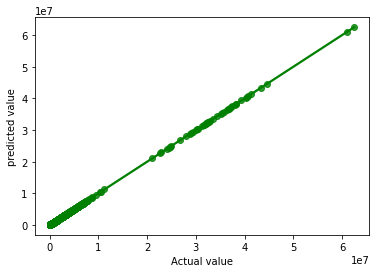

In [71]:
sns.regplot(x=new_df['Actual value'],y=new_df['predicted value'],color='green')

In [72]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred))
print("percentage",mean_absolute_percentage_error(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("r2 square",r2_score(y_test,y_pred))


MAE 4.0877376937449085e-10
percentage 1.9240172069374816e-14
mean_squared_error 1.4453506275747991e-18
r2 square 1.0
